In [90]:
import numpy as np
import pandas as pd
import h5py
import ot

filename = "/root/MJ12AWhichMetricsImprovePrediction.txt"

df = pd.read_csv(filename, ";")

In [91]:

df.head(10)

,Project,Version,Class,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,nr,ndc,nml,ndpv,max(cc),avg(cc),bugs
0,ant,1.3,org.apache.tools.ant.taskdefs.GenerateKey,14,3,0,6,33,65,0,6,14,0.910256,404,1.000000,1,0.740000,0.595238,2,3,27.000000,-,-,-,-,2,1.000000,0
1,ant,1.3,org.apache.tools.ant.taskdefs.compilers.Compil...,3,1,0,8,16,3,1,7,1,2.000000,125,0.000000,0,0.000000,0.444444,0,0,40.666668,-,-,-,-,1,0.666667,0
2,ant,1.3,org.apache.tools.ant.taskdefs.KeySubst,8,3,0,3,40,10,0,3,8,0.714286,271,1.000000,0,0.840909,0.406250,1,1,32.375000,-,-,-,-,4,1.250000,0
3,ant,1.3,org.apache.tools.ant.taskdefs.JavacOutputStream,4,2,0,1,11,0,0,1,1,0.222222,68,1.000000,1,0.625000,0.500000,1,1,15.250000,-,-,-,-,2,1.000000,0
4,ant,1.3,org.apache.tools.mail.MailMessage,27,1,0,3,63,297,1,2,10,0.778846,527,0.000000,2,0.000000,0.379630,0,0,18.222221,-,-,-,-,11,1.444444,0
5,ant,1.3,org.apache.tools.ant.taskdefs.Touch,8,3,0,7,32,8,3,4,5,0.738095,300,0.833333,0,0.860465,0.357143,1,1,35.750000,-,-,-,-,1,0.750000,0
6,ant,1.3,org.apache.tools.ant.BuildLogger,4,1,0,3,4,6,2,1,4,2.000000,4,0.000000,0,0.000000,0.500000,0,0,0.000000,-,-,-,-,1,1.000000,0
7,ant,1.3,org.apache.tools.ant.taskdefs.Execute$CommandL...,4,1,3,10,13,6,7,3,2,2.000000,42,0.000000,0,0.000000,0.500000,0,0,9.500000,-,-,-,-,1,0.500000,0
8,ant,1.3,org.apache.tools.ant.taskdefs.Replace$NestedSt...,3,1,0,2,7,0,2,1,3,0.500000,26,1.000000,1,0.000000,0.555556,0,0,7.000000,-,-,-,-,1,0.666667,0
9,ant,1.3,org.apache.tools.ant.Constants,0,1,0,0,0,0,0,0,0,2.000000,0,0.000000,0,0.000000,0.000000,0,0,0.000000,-,-,-,-,0,0.000000,0


In [92]:
projects_data = {}
for project, df_project in df.groupby('Project'):
    projects_data[project] = df_project

In [93]:
for i in projects_data.keys():
    print i
    print projects_data[i].shape

lucene
(1205, 28)
synapse
(661, 28)
prop-5
(20406, 28)
prop-42
(871, 28)
xerces
(1937, 28)
camel
(3575, 28)
pBeans
(96, 28)
prop-1
(23058, 28)
ivy
(933, 28)
ant
(2442, 28)
prop-3
(8867, 28)
jEdit
(3695, 28)
prop-2
(10687, 28)
prop-4
(8573, 28)
poi
(1683, 28)
velocity
(731, 28)
xalan
(4171, 28)
log4j
(557, 28)


In [113]:
source_project = projects_data['prop-1'].copy(deep=True)
target_project = projects_data['prop-5'].copy(deep=True)

source_project = source_project.replace('-', np.nan)
source_project.dropna(axis=0, inplace=True)
target_project = target_project.replace('-', np.nan)
target_project.dropna(axis=0, inplace=True)


In [114]:
#source_project["Version"] = pd.Categorical(source_project["Version"]).codes
#source_project["Class"] = pd.Categorical(source_project["Class"]).codes

#target_project["Version"] = pd.Categorical(target_project["Version"]).codes
#target_project["Class"] = pd.Categorical(target_project["Class"]).codes


In [115]:
source_labels = source_project['bugs'].copy(deep=True)
target_labels = target_project['bugs'].copy(deep=True)

del source_project['Project']
del source_project['bugs']
del source_project['Version']
del source_project['Class']

del target_project['Project']
del target_project['bugs']
del target_project['Version']
del target_project['Class']

In [116]:
source_project = source_project.applymap(int)
target_project = target_project.applymap(int)

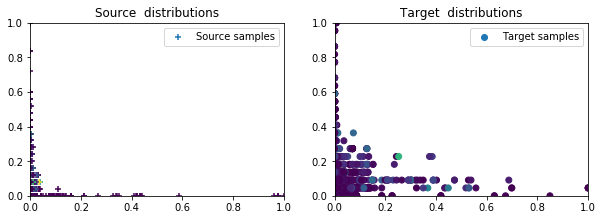

In [120]:
import matplotlib.pylab as pl
pl.figure(1,(10,7))

xs = source_project.values
ys = source_labels.values
xt = target_project.values
yt = target_labels.values

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
xs_scaled = min_max_scaler.fit_transform(xs)
pd.set_option('display.max_columns', 28)
pd.set_option('display.max_rows', 100)
target_project.head(100)

xt_scaled = min_max_scaler.fit_transform(xt)

m=5
n=-1

pl.subplot(2,2,1)
pl.scatter(xs_scaled[:,m],xs_scaled[:,n],c=ys,marker='+',label='Source samples')
pl.legend(loc=0)
pl.axis([0,1,0,1])
pl.title('Source  distributions')

pl.subplot(2,2,2)
pl.scatter(xt_scaled[:,m],xt_scaled[:,n],c=yt,marker='o',label='Target samples')
pl.legend(loc=0)
pl.axis([0,1,0,1])
pl.title('Target  distributions')

pl.show()

In [55]:
# LP problem
da_emd=ot.da.OTDA()     # init class
da_emd.fit(xs_scaled,xt_scaled)       # fit distributions
xst0=da_emd.interp()    # interpolation of source samples


# sinkhorn regularization
lambd=1e-1
da_entrop=ot.da.OTDA_sinkhorn()
da_entrop.fit(xs_scaled,xt_scaled,reg=lambd)
xsts=da_entrop.interp()

# Group lasso regularization
reg=1e-1
eta=1e0
da_lpl1=ot.da.OTDA_lpl1()
da_lpl1.fit(xs_scaled,ys,xt_scaled,reg=lambd,eta=eta)
xstg=da_lpl1.interp()

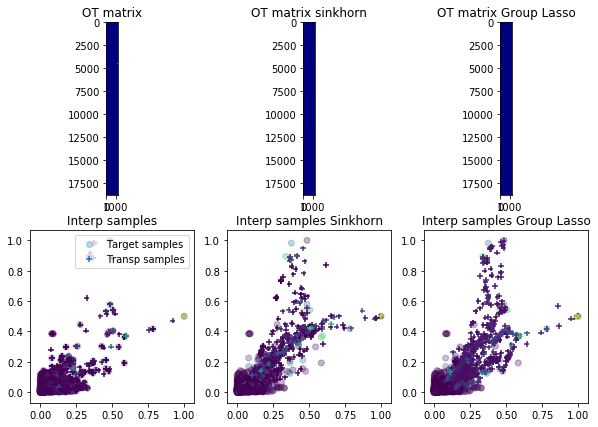

In [56]:
pl.figure(4,(10,7))

param_img={'interpolation':'nearest','cmap':'jet'}

pl.subplot(2,3,1)
pl.imshow(da_emd.G,**param_img)
pl.title('OT matrix')


pl.subplot(2,3,2)
pl.imshow(da_entrop.G,**param_img)
pl.title('OT matrix sinkhorn')

pl.subplot(2,3,3)
pl.imshow(da_lpl1.G,**param_img)
pl.title('OT matrix Group Lasso')

pl.subplot(2,3,4)
pl.scatter(xt_scaled[:,m],xt_scaled[:,n],c=yt,marker='o',label='Target samples',alpha=0.3)
pl.scatter(xst0[:,m],xst0[:,n],c=ys,marker='+',label='Transp samples',s=30)
pl.title('Interp samples')
pl.legend(loc=0)

pl.subplot(2,3,5)
pl.scatter(xt_scaled[:,m],xt_scaled[:,n],c=yt,marker='o',label='Target samples',alpha=0.3)
pl.scatter(xsts[:,m],xsts[:,n],c=ys,marker='+',label='Transp samples',s=30)
pl.title('Interp samples Sinkhorn')

pl.subplot(2,3,6)
pl.scatter(xt_scaled[:,m],xt_scaled[:,n],c=yt,marker='o',label='Target samples',alpha=0.3)
pl.scatter(xstg[:,m],xstg[:,n],c=ys,marker='+',label='Transp samples',s=30)
pl.title('Interp samples Group Lasso')

pl.show()

In [57]:
from xgboost.sklearn import XGBClassifier
from sklearn.cross_validation import cross_val_score

In [58]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support as score

clf_xgb = XGBClassifier(max_depth=8, learning_rate=0.01, n_estimators=950, subsample=0.62, colsample_bytree=0.6, seed=1)
clf_xgb.fit(xst0, ys)
predicted = clf_xgb.predict(da_emd.predict(xt_scaled))
err_train = np.mean(ys != clf_xgb.predict(xst0))
err_test = np.mean(yt != predicted)
print err_train, err_test

fscore = f1_score(yt, predicted, average='weighted')

precision, recall, fscore, support = score(yt, predicted)

print fscore
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

0.119374401532 0.16837944664
[ 0.91042839  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        ]
precision: [ 0.839585  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.        0.      ]
recall: [ 0.99432892  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        ]
fscore: [ 0.91042839  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        ]


In [59]:
clf_xgb = XGBClassifier(max_depth=8, learning_rate=0.01, n_estimators=950, subsample=0.62, colsample_bytree=0.6, seed=1)
clf_xgb.fit(xsts, ys)
predicted = clf_xgb.predict(da_entrop.predict(xt_scaled))
err_train = np.mean(ys != clf_xgb.predict(xsts))
err_test = np.mean(yt != predicted)
print err_train, err_test

fscore = f1_score(yt, predicted, average='weighted')
precision, recall, fscore, support = score(yt, predicted)

print fscore
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

0.0784125970848 0.170750988142
[ 0.9109083  0.         0.         0.08       0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.       ]
precision: [ 0.84312148  0.          0.          0.5         0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        ]
recall: [ 0.9905482   0.          0.          0.04347826  0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        ]
fscore: [ 0.9109083  0.         0.         0.08       0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.       ]


In [60]:
clf_xgb = XGBClassifier(max_depth=8, learning_rate=0.01, n_estimators=950, subsample=0.62, colsample_bytree=0.6, seed=1)
clf_xgb.fit(xstg, ys)
predicted = clf_xgb.predict(da_lpl1.predict(xt_scaled))
err_train = np.mean(ys != clf_xgb.predict(xstg))
err_test = np.mean(yt != predicted)
print err_train, err_test

fscore = f1_score(yt, predicted, average='weighted')
precision, recall, fscore, support = score(yt, predicted)

print fscore
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

5.31971486328e-05 0.275889328063
[ 0.85810163  0.12820513  0.04545455  0.08888889  0.07407407  0.          0.
  0.25        0.          0.          0.          0.          0.          0.
  0.          0.        ]
precision: [ 0.87062257  0.1171875   0.04081633  0.09090909  0.06666667  0.          0.
  0.33333333  0.          0.          0.          0.          0.          0.
  0.          0.        ]
recall: [ 0.84593573  0.14150943  0.05128205  0.08695652  0.08333333  0.          0.
  0.2         0.          0.          0.          0.          0.          0.
  0.          0.        ]
fscore: [ 0.85810163  0.12820513  0.04545455  0.08888889  0.07407407  0.          0.
  0.25        0.          0.          0.          0.          0.          0.
  0.          0.        ]
